### setup

In [31]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import signal
%matplotlib inline

#define variables
filename = 'toy_data.pkl'
samp_rate = 1000 #Hz
n_samples = 10000 #samples at 1000Hz -> 10 min recording
n_positionbins = 50 
max_position = 100 #meters
step = round(max_position/n_positionbins)
n_placecells = 5
n_cells = 10
firing_rate_minmax = [1,100] #min and max FR values

### generate toy data values

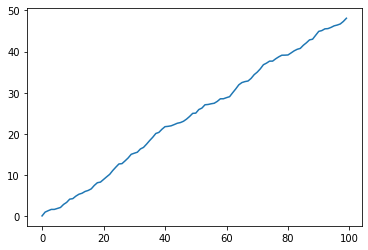

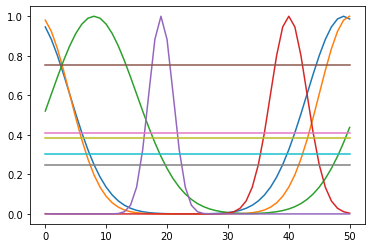

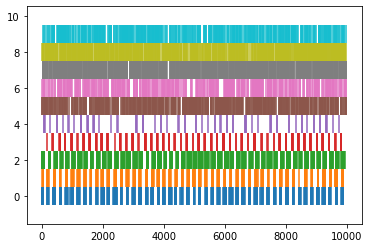

In [33]:
np.random.seed(1111)

#make time vect
time = np.linspace(0,n_samples/samp_rate,n_samples)

#make position vects
pos = np.zeros([n_samples])
for i in range(n_samples):
    if pos[i-1] < max_position:
        pos[i] = pos[i-1] + np.random.uniform()
    else:
        pos[i] = 0
fig1 = plt.figure(1)
p1 = plt.plot(pos[0:int(n_samples/100)])

#make spatial maps for each neuron
place_fields = np.empty(shape=(n_cells,51), dtype=object)
for i in range(n_placecells): 
    dist = signal.gaussian(51, std=np.random.randint(1,10))  #make place cells have gaussian dists
    dist_start_loc = np.random.randint(1,51)
    dist_inds = range(dist_start_loc,dist_start_loc+51)
    place_fields[i,:] = dist.take(dist_inds, mode='wrap')
for i in range(n_placecells,n_cells):
    place_fields[i,:] = np.ones([1,51])*np.random.uniform() #make non-place cells have uniform dists
fig2 = plt.figure(2)
p2 = plt.plot(np.transpose(place_fields))
cmap = plt.get_cmap("tab10")

#convert from spatial map of spike counts for each place cell
firing_rates = np.random.uniform(low=firing_rate_minmax[0],high=firing_rate_minmax[1], size=(1,n_cells))
spike_counts = np.round(firing_rates/samp_rate*n_samples) #(X samples) / (Y samples/sec) * Z (spikes/sec) -> spikes
place_fields_norm = place_fields/place_fields.sum(axis=1,keepdims=True)
spike_counts_map = place_fields_norm*spike_counts.T

#distribute spikes throughout time series in random bins corresponding to position
fig3 = plt.figure(3)
spike_vects = np.zeros([n_cells,n_samples])
for c in range(n_cells):
    for idx, ibin in enumerate([[i, i+step] for i in range(0, max_position, step)]):
        pos_inds = np.where((pos >= min(ibin)) & (pos < max(ibin)))[0]
        inds_to_fill = random.sample(range(len(pos_inds)),round(spike_counts_map[c,idx]))
        spike_vects[c,pos_inds[inds_to_fill]] = np.ones(np.shape(inds_to_fill))
    p3 = plt.eventplot(np.where(spike_vects[c,:])[0],lineoffsets = c, colors = cmap(c))

## save toy data

In [34]:
df = pd.concat([pd.DataFrame({'time':time,'position':pos}), pd.DataFrame(spike_vects.T)], axis=1,keys=['behavior','neurons'])
df.to_pickle(filename)
df.head()

behavior           neurons                                             
      time  position       0    1    2    3    4    5    6    7    8    9
0    0.000  0.095549     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.001  1.020553     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.002  1.364126     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.003  1.674603     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.004  1.676613     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0